In [ ]:
def split_dataset(x_dataset, y_dataset, ratio):
    arr = np.arange(x_dataset.size)
    np.random.shuffle(arr)
    num_train = int(ratio * x_dataset.size)
    x_train = x_dataset[arr[0:num_train]]
    x_test = x_dataset[arr[num_train:x_dataset.size]]
    y_train = y_dataset[arr[0:num_train]]
    y_test = y_dataset[arr[num_train:x_dataset.size]]
    return x_train, x_test, y_train, y_test

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(45)

In [3]:
learning_rate = 0.001
training_epochs = 1000
reg_lambda = float(0)
num_coeffs = 9

In [4]:
x_dataset = np.linspace(-1, 1, 100)

In [5]:
y_dataset_params = [0.] * num_coeffs
y_dataset_params[2] = 1
y_dataset = 0
for i in range(num_coeffs):
    y_dataset += y_dataset_params[i] * np.power(x_dataset, i)
y_dataset += np.random.randn(*x_dataset.shape) * 0.3

In [6]:
(x_train, x_test, y_train, y_test) = split_dataset(x_dataset, y_dataset, 0.7)

In [7]:
X = tf.constant(x_train, dtype=tf.float32)
Y = tf.constant(y_train, dtype=tf.float32)
w = tf.Variable([0.] * num_coeffs, name='parameters', dtype=tf.float32)

In [8]:
@tf.function
def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)    
    return tf.add_n(terms)

In [9]:
@tf.function
def y_model():
    return model(X, w)

In [10]:
@tf.function
def cost():
    w_sqr = tf.square(w)
    w_red = tf.reduce_sum(w_sqr)
    m_lmd_w_sqr = tf.multiply(tf.convert_to_tensor(reg_lambda, dtype=tf.float32), w_red)
    y_y_model_sqr = tf.reduce_sum(tf.square(Y-y_model()))
    sum_y_model_sqr_reglambda_w_sqr = tf.add(y_y_model_sqr, m_lmd_w_sqr)
    return tf.math.divide(sum_y_model_sqr_reglambda_w_sqr, 2*x_train.size)

In [11]:
train_op = tf.keras.optimizers.SGD(learning_rate)

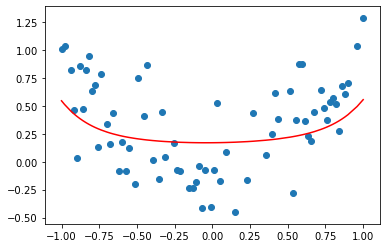

reg lambda 0.0
final coeffs [ 0.16987553  0.01110765  0.13462476 -0.00044605  0.09926572 -0.00273733
  0.07955347 -0.00284702  0.06724676]


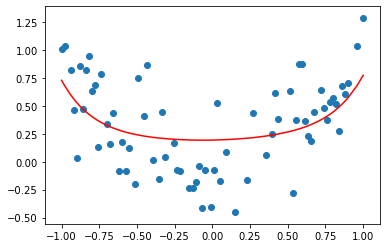

reg lambda 0.010101010101010102
final coeffs [ 0.19381557  0.02456893  0.19396193  0.00205333  0.14554077 -0.00207786
  0.1178978  -0.00224593  0.10054322]


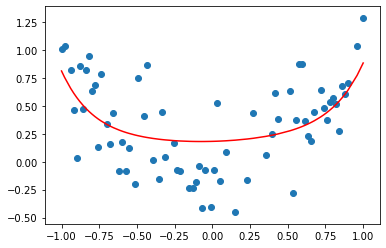

reg lambda 0.020202020202020204
final coeffs [ 0.18218172  0.03533924  0.2294431   0.00359739  0.17371766 -0.00164741
  0.14158334 -0.00154066  0.12143946]


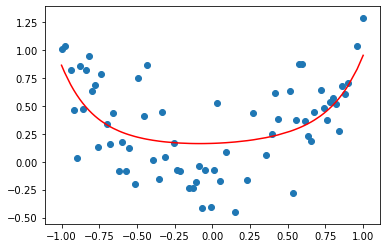

reg lambda 0.030303030303030304
final coeffs [ 0.16410281  0.04342585  0.25559694  0.00397321  0.19390552 -0.00181956
  0.15841939 -0.00116217  0.13634168]


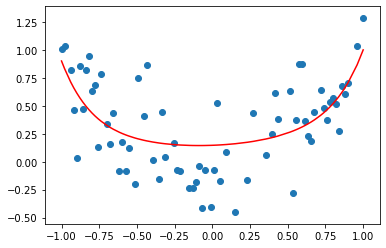

reg lambda 0.04040404040404041
final coeffs [ 0.14689519  0.04957312  0.27688247  0.00355453  0.20941089 -0.00239431
  0.17105426 -0.0009981   0.14747441]


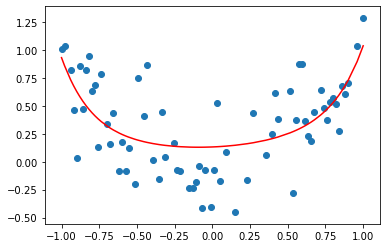

reg lambda 0.05050505050505051
final coeffs [ 0.1320723   0.05439826  0.29494074  0.00266556  0.22160059 -0.00316975
  0.18064736 -0.00091045  0.15584745]


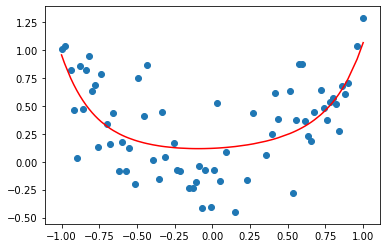

reg lambda 0.06060606060606061
final coeffs [ 0.11965526  0.05831138  0.3105683   0.00151078  0.23122975 -0.00402014
  0.18787502 -0.00081411  0.16206767]


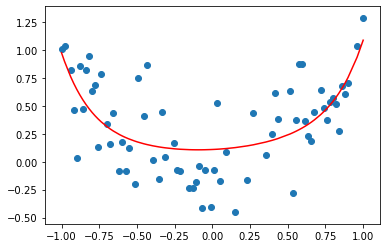

reg lambda 0.07070707070707072
final coeffs [ 1.09327696e-01  6.15730584e-02  3.24265987e-01  2.07617850e-04
  2.38816097e-01 -4.87861643e-03  1.93215430e-01 -6.67505665e-04
  1.66571304e-01]


In [12]:
iters = 0
indices = np.argsort(x_train)
for reg_lambda in np.linspace(0, 1, 100):
    iters += 1
    for epoch in range(training_epochs):
        train_op.minimize(cost, w)
    final_coeffs = w.value()
    
    # Print the first 8 attempts (for illustration)
    if iters in range(9):
        plt.scatter(x_train, y_train)

        y1 = 0
        for i in range(num_coeffs):
            y1 += final_coeffs[i] * np.power(X, i)

        plt.plot(x_train[indices], y1.numpy()[indices], 'r')
        plt.show()
        
        print('reg lambda', reg_lambda)
        print('final coeffs', final_coeffs.numpy())

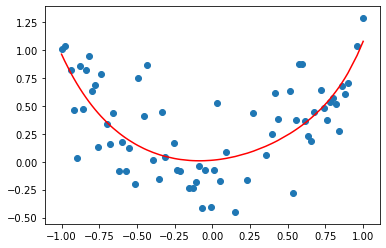

Final result


In [13]:
plt.scatter(x_train, y_train)

y1 = 0
for i in range(num_coeffs):
    y1 += final_coeffs[i] * np.power(X, i)

plt.plot(x_train[indices], y1.numpy()[indices], 'r')
plt.show()
print("Final result")